<a href="https://colab.research.google.com/github/anssodre/datascience/blob/master/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Lisboa, Portugal*

<center><img alt="Analisando Airbnb"  src="https://www.flytap.com/-/media/Flytap/Campaigns/2017/NewDest/BB1024x553_LISBOA.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. O detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao Distrito de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

Lisboa é a capital de Portugal e é uma das cidades mais carismáticas e vibrantes da Europa. É uma cidade que mistura o patrimônio tradicional sem esforço, com um impressionante modernismo. Como um destino de férias, Lisboa oferece uma história rica e variada, uma agitada vida noturna e é abençoada com um clima glorioso durante o ano todo.

Lisboa é uma cidade movimentada e animada, possuindo uma grande variedade de atividades e atrações turísticas fascinantes. A cidade tem uma atmosfera acolhedora e liberal, enquanto ainda abraça a sua herança profundamente enraizada e história vasta. Lisboa irá atrair uma seleção diversificada de idades e turistas; pode formar uma viagem cultural, uma extravagância da vida noturna, férias em família, uma pausa relaxante na cidade ou até mesmo como base para umas férias na praia.

A capital portuguesa é reconhecida constantemente como uma das melhores cidades do mundo, uma afirmação confirmada por “Lonely Planet Guides”, que nomeou Lisboa como uma das 10 melhores cidades do mundo. Surpreendentemente, Lisboa ainda é uma das capitais menos visitadas da Europa, mas isso está mudando rapidamente à medida que novos visitantes descobrem o fascínio de Portugal.

Fonte: https://lisbonlisboaportugal.com/lisboa-portugal-guia-br.html

#### Obtenção dos Dados
Os dados usados foram obtidos do site [Inside Airbnb](https://insideairbnb.com/get-the-data.html), com a data de compilação em 28 de maio de 2020.

In [0]:
# Iremos importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/listings.csv")

## Análise dos Dados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - município
* `neighbourhood` - bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.38,1,307
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.54,1,317
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,321,2020-03-11,2.82,1,351
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,1,239,2020-03-15,2.47,2,318
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,300


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24640
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Este *dataset* que baixamos é a versão "resumida" do Airbnb, que contém 24640 entradas e 16 variáveis.**

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [0]:
# Verificar valores ausentes no dataset e colocar em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.168547
last_review                       0.168547
name                              0.000771
host_name                         0.000041
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que a coluna `reviews_per_month` possui 16,8% dos seus valores faltantes.
* É possível ver que a coluna `last_review` possui 16,8% dos seus valores faltantes. 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

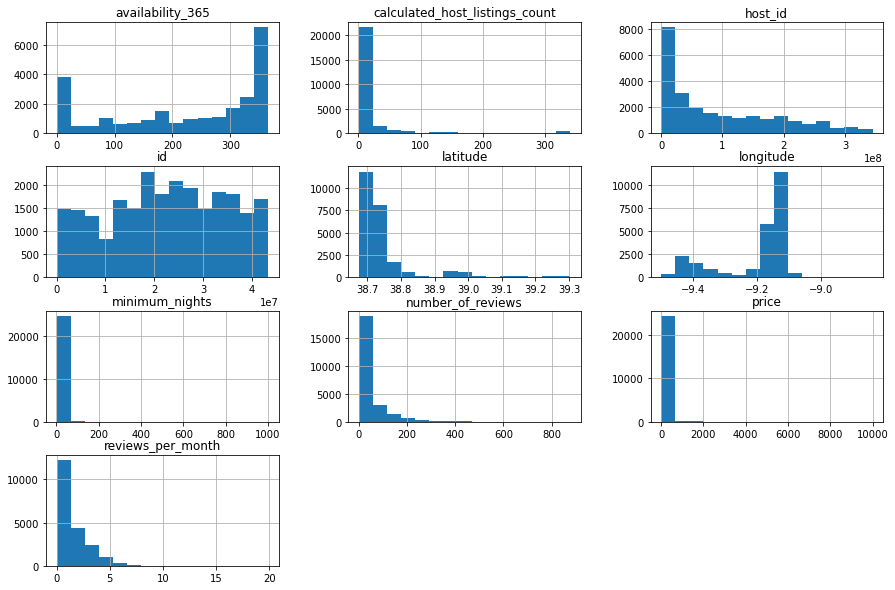

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24640.000000,24640.000000,24640.000000,20487.000000,24640.000000,24640.000000
mean,110.739732,3.294440,41.781291,1.459542,15.057224,225.239448
std,350.763230,15.970015,65.881125,1.461515,43.355842,132.790977
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,0.320000,1.000000,118.000000
50%,69.000000,2.000000,14.000000,0.960000,3.000000,269.000000
75%,100.000000,3.000000,53.000000,2.210000,10.000000,349.000000
max,10000.000000,1000.000000,877.000000,19.890000,340.000000,365.000000


## Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

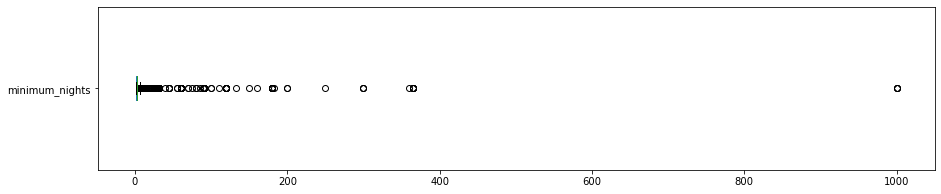

minimum_nights: valores acima de 30:
100 entradas
0.4058%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

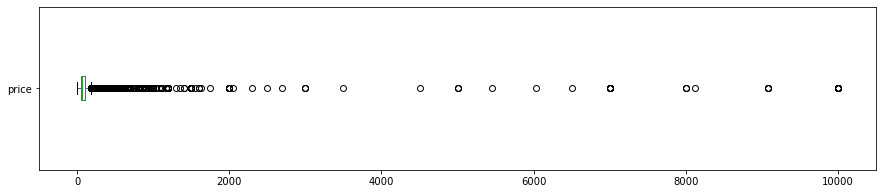


price: valores acima de 1500
57 entradas
0.2313%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 60].index, axis=0, inplace=True)

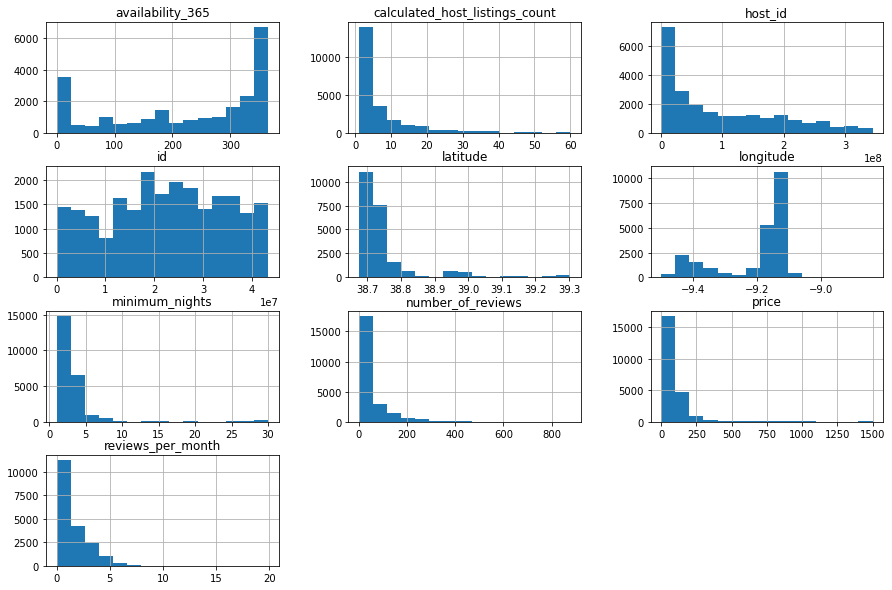

In [0]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [0]:
print('Quantidade de variáveis {}'.format(df_clean.shape[0]))
print('Quantidade de entradas {}'.format(df_clean.shape[1]))
df_limpo = (df_clean.shape[0] / df.shape[0]) -1
print('Foram removidos {:.2%} dos dados na limpeza do dataset.'.format(df_limpo * (-1)))

Quantidade de variáveis 23220
Quantidade de entradas 16
Foram removidos 5.76% dos dados na limpeza do dataset.


### Resumo estatístico após limpeza dos outliers

In [0]:
df_clean[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
          'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23220.000000,23220.000000,23220.000000,19336.000000,23220.000000,23220.000000
mean,97.228424,2.716968,43.391602,1.502402,7.262317,224.608570
std,124.306829,3.384602,67.243900,1.483627,10.123960,132.692619
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,2.000000,0.330000,1.000000,117.000000
50%,69.000000,2.000000,14.000000,1.010000,3.000000,269.000000
75%,100.000000,3.000000,56.000000,2.300000,8.000000,349.000000
max,1500.000000,30.000000,877.000000,19.890000,60.000000,365.000000


### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.035038,-0.126661,-0.124047,-0.002353,0.010003
minimum_nights,-0.035038,1.000000,-0.051181,-0.101343,-0.049146,-0.023528
number_of_reviews,-0.126661,-0.051181,1.000000,0.780244,-0.072072,0.085859
reviews_per_month,-0.124047,-0.101343,0.780244,1.000000,-0.063167,0.076246
calculated_host_listings_count,-0.002353,-0.049146,-0.072072,-0.063167,1.000000,0.040110
availability_365,0.010003,-0.023528,0.085859,0.076246,0.040110,1.000000


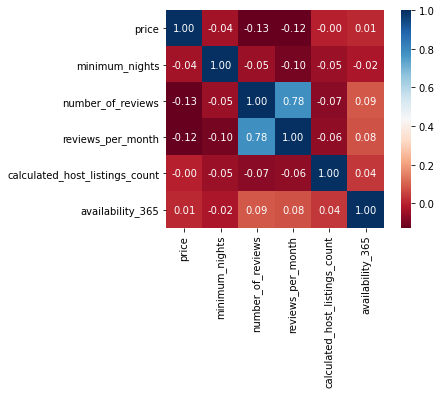

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16618
Private room        5588
Hotel room           571
Shared room          443
Name: room_type, dtype: int64

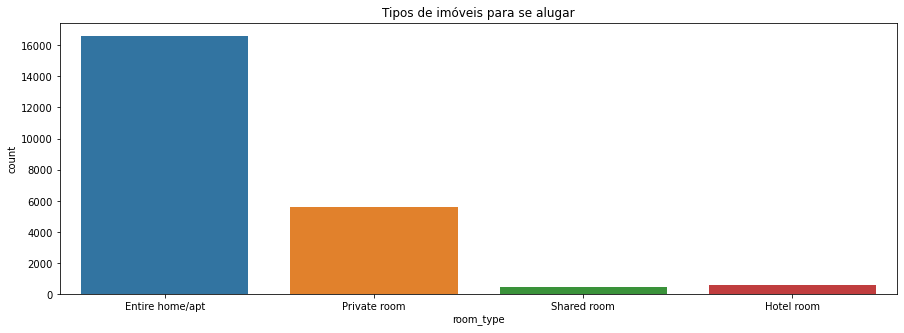

In [0]:
#gráfico representando por tipo de imóvel
plt.figure(figsize=(15,5))
sns.countplot(df_clean['room_type'])
plt.title('Tipos de imóveis para se alugar');

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
a = (df_clean.room_type.value_counts() / df_clean.shape[0])
df_clean_a = pd.DataFrame(a)
df_clean_a.style.format('{:.2%}')

,room_type
Entire home/apt,71.57%
Private room,24.07%
Hotel room,2.46%
Shared room,1.91%


Podemos concluir que:
* Há 16618 opções de aluguel de apartamentos/casas, sendo 71,57% das opções de locação.
* Há 5588 opções de aluguel de quartos privados, sendo 24,07% das opções de locação.
* Há 571 opções de aluguel de quartos compartilhados, sendo 2,46% das opções de locação.
* Há 443 opções de aluguel em hotel, sendo 1,91% das opções de locação.

### **Q7. Qual a localidade mais cara de Lisboa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vermelha                  292.500000
Cardosas                  280.000000
Aveiras de Baixo          269.500000
Ota                       249.000000
Freiria                   220.000000
Peral                     174.800000
Bucelas                   170.300000
So Domingos de Benfica    167.225352
Alcabideche               154.391509
Vale do Paraso            150.000000
Name: price, dtype: float64

* Vemos que Vermelha, Cardosas e Aveiras de Baixo são os locais com a média mais cara de Lisboa.

Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Vermelha, Cardosas e Aveiras de Baixo.

In [0]:
#ver quantidade de imóveis nos 3 primeiros bairros e a porcentagem em relação ao total de imóveis
print("{} entradas".format(len(df_clean[df_clean.neighbourhood == "Vermelha"].index)))
print("{:.4f}%".format((len(df_clean[df_clean.neighbourhood == "Vermelha"].index) / df.shape[0])*100))
print("{} entradas".format(len(df_clean[df_clean.neighbourhood == "Cardosas"].index)))
print("{:.4f}%".format((len(df_clean[df_clean.neighbourhood == "Cardosas"].index) / df.shape[0])*100))
print("{} entradas".format(len(df_clean[df_clean.neighbourhood == "Aveiras de Baixo"].index)))
print("{:.4f}%".format((len(df_clean[df_clean.neighbourhood == "Aveiras de Baixo"].index) / df.shape[0])*100))

2 entradas
0.0081%
1 entradas
0.0041%
2 entradas
0.0081%


In [0]:
#quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts()

Santa Maria Maior      3450
Misericrdia            2730
Arroios                2235
Cascais e Estoril      1484
So Vicente             1322
                       ... 
Vila Nova da Rainha       1
Cardosas                  1
Alcoentre                 1
Vale do Paraso            1
Ota                       1
Name: neighbourhood, Length: 127, dtype: int64

### **Q8. Como é a distribuição dos imóveis pela cidade de Lisboa?**

As variáveis Latitude e Longitude dos imóveis possibilita plotar cada ponto e mapear os imóveis. Considera-se x=longitude e y=latitude.

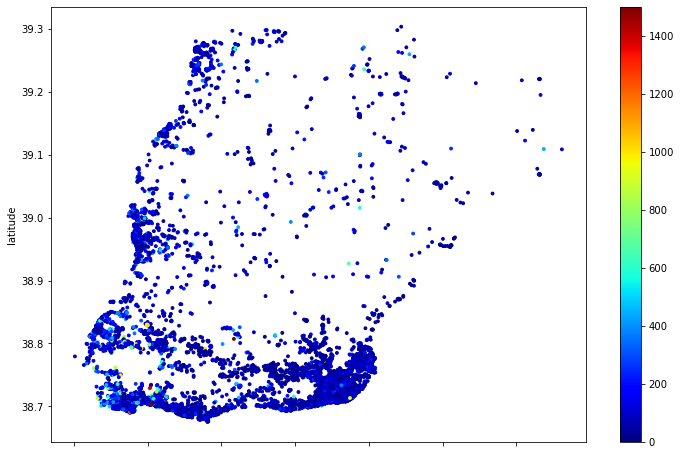

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1.0, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers nas colunas `price`, `minimum_nights` e `calculated_host_listings_count`. Também se notou que há em algumas localidades poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

* A análise aponta que Vermelha é o bairro mais caro para se hospedar, com uma média de 292 euros. 
* No geral, a média das hospedagens são feitas com o mínimo de 3 dias e uma média de preço de 97 euros e com o máximo de 1500 euros. 
* Os apartamentos são os tipos de imóveis de maior opção, sendo 71,57% das opções de locação.
* Santa Maria Maior é o bairro com a maior quantidade de imóveis disponíveis, com cerca de 3450.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.